In [1]:
import pandas as pd

# Load the data from the provided CSV file
file_path = 'mxmh_survey_results.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head(), data.columns


(            Timestamp   Age Primary streaming service  Hours per day  \
 0  8/27/2022 19:29:02  18.0                   Spotify            3.0   
 1  8/27/2022 19:57:31  63.0                   Pandora            1.5   
 2  8/27/2022 21:28:18  18.0                   Spotify            4.0   
 3  8/27/2022 21:40:40  61.0             YouTube Music            2.5   
 4  8/27/2022 21:54:47  18.0                   Spotify            4.0   
 
   While working Instrumentalist Composer         Fav genre Exploratory  \
 0           Yes             Yes      Yes             Latin         Yes   
 1           Yes              No       No              Rock         Yes   
 2            No              No       No  Video game music          No   
 3           Yes              No      Yes              Jazz         Yes   
 4           Yes              No       No               R&B         Yes   
 
   Foreign languages  ...  Frequency [R&B]  Frequency [Rap] Frequency [Rock]  \
 0               Yes  ...   

In [4]:
# Data Cleaning
data_cleaned = data.copy()

# Handle missing values - filling with appropriate values or dropping if necessary
data_cleaned['Music effects'] = data_cleaned['Music effects'].fillna('No effect')

# Convert columns to appropriate data types
data_cleaned['Age'].fillna(value=data_cleaned['Age'].mean(), inplace=True)
data_cleaned['Age'] = data_cleaned['Age'].astype(int)
data_cleaned['Hours per day'] = data_cleaned['Hours per day'].astype(float)
mental_health_columns = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
data_cleaned[mental_health_columns] = data_cleaned[mental_health_columns].astype(float)

# Summary Statistics
summary_stats = data_cleaned.describe()

# import ace_tools as tools; tools.display_dataframe_to_user(name="Summary Statistics", dataframe=summary_stats)


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

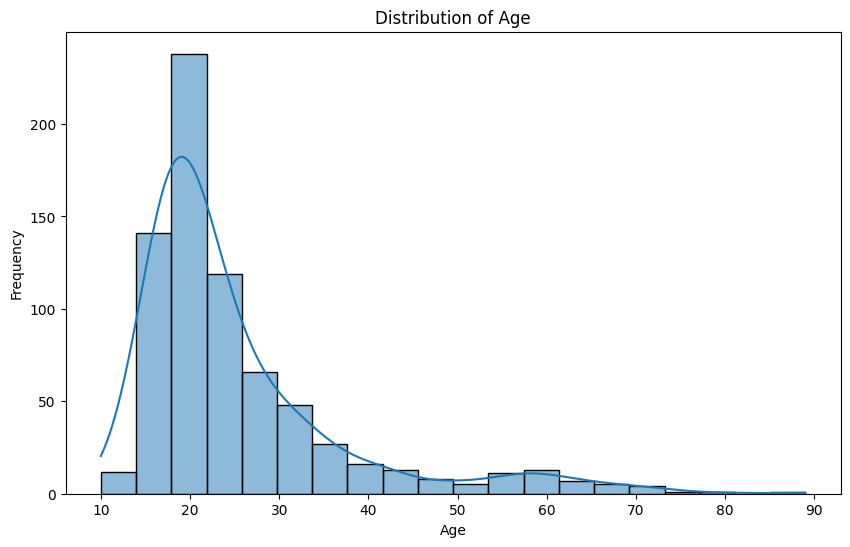

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Age'], kde=True, bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

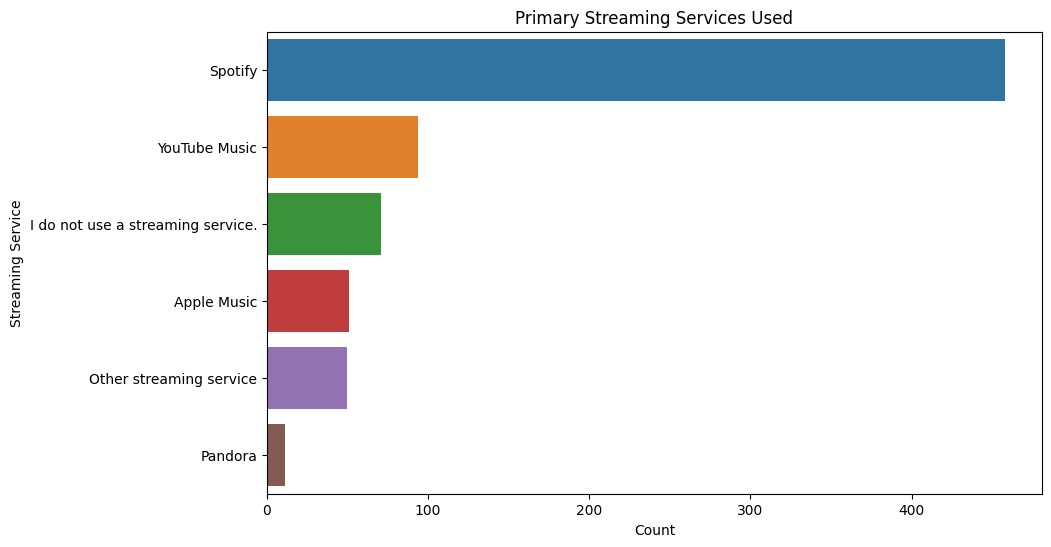

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(y=data_cleaned['Primary streaming service'], order=data_cleaned['Primary streaming service'].value_counts().index)
plt.title('Primary Streaming Services Used')
plt.xlabel('Count')
plt.ylabel('Streaming Service')
plt.show()


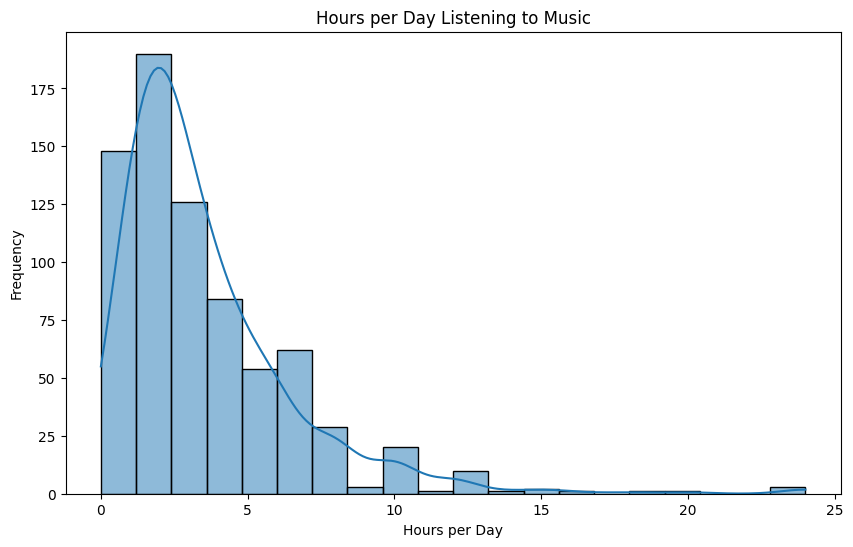

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Hours per day'], kde=True, bins=20)
plt.title('Hours per Day Listening to Music')
plt.xlabel('Hours per Day')
plt.ylabel('Frequency')
plt.show()


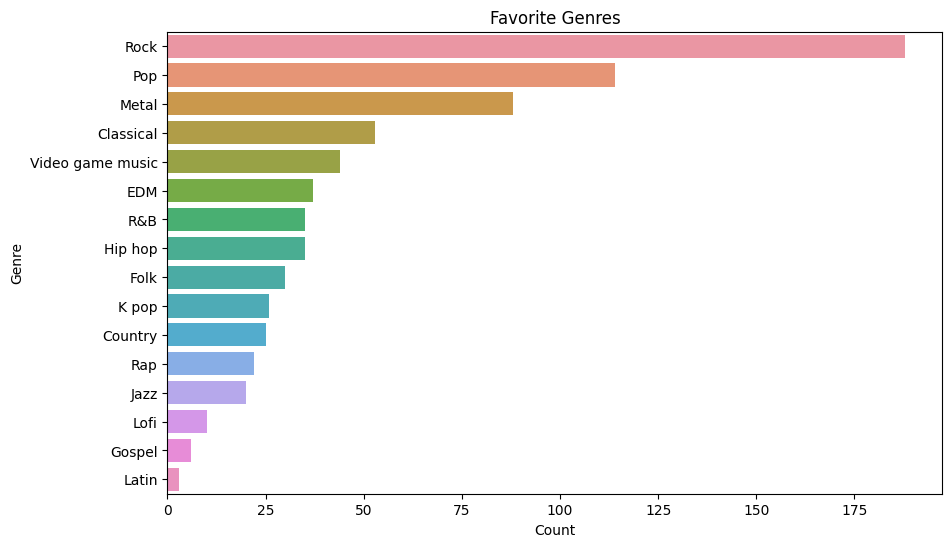

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(y=data_cleaned['Fav genre'], order=data_cleaned['Fav genre'].value_counts().index)
plt.title('Favorite Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


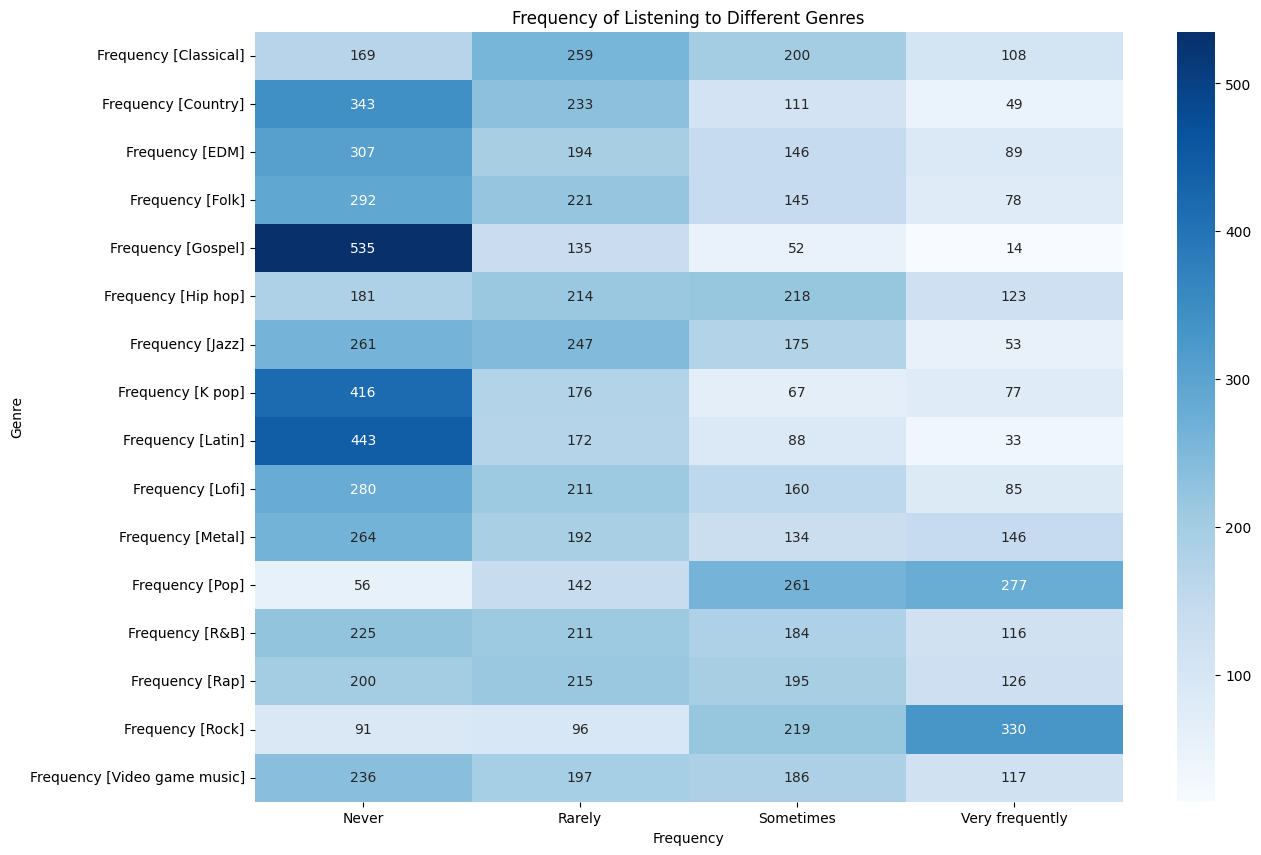

In [13]:
genre_columns = [col for col in data_cleaned.columns if 'Frequency [' in col]
genre_data = data_cleaned[genre_columns].apply(pd.Series.value_counts).fillna(0)

plt.figure(figsize=(14, 10))
sns.heatmap(genre_data.T, annot=True, fmt='g', cmap='Blues')
plt.title('Frequency of Listening to Different Genres')
plt.xlabel('Frequency')
plt.ylabel('Genre')
plt.show()


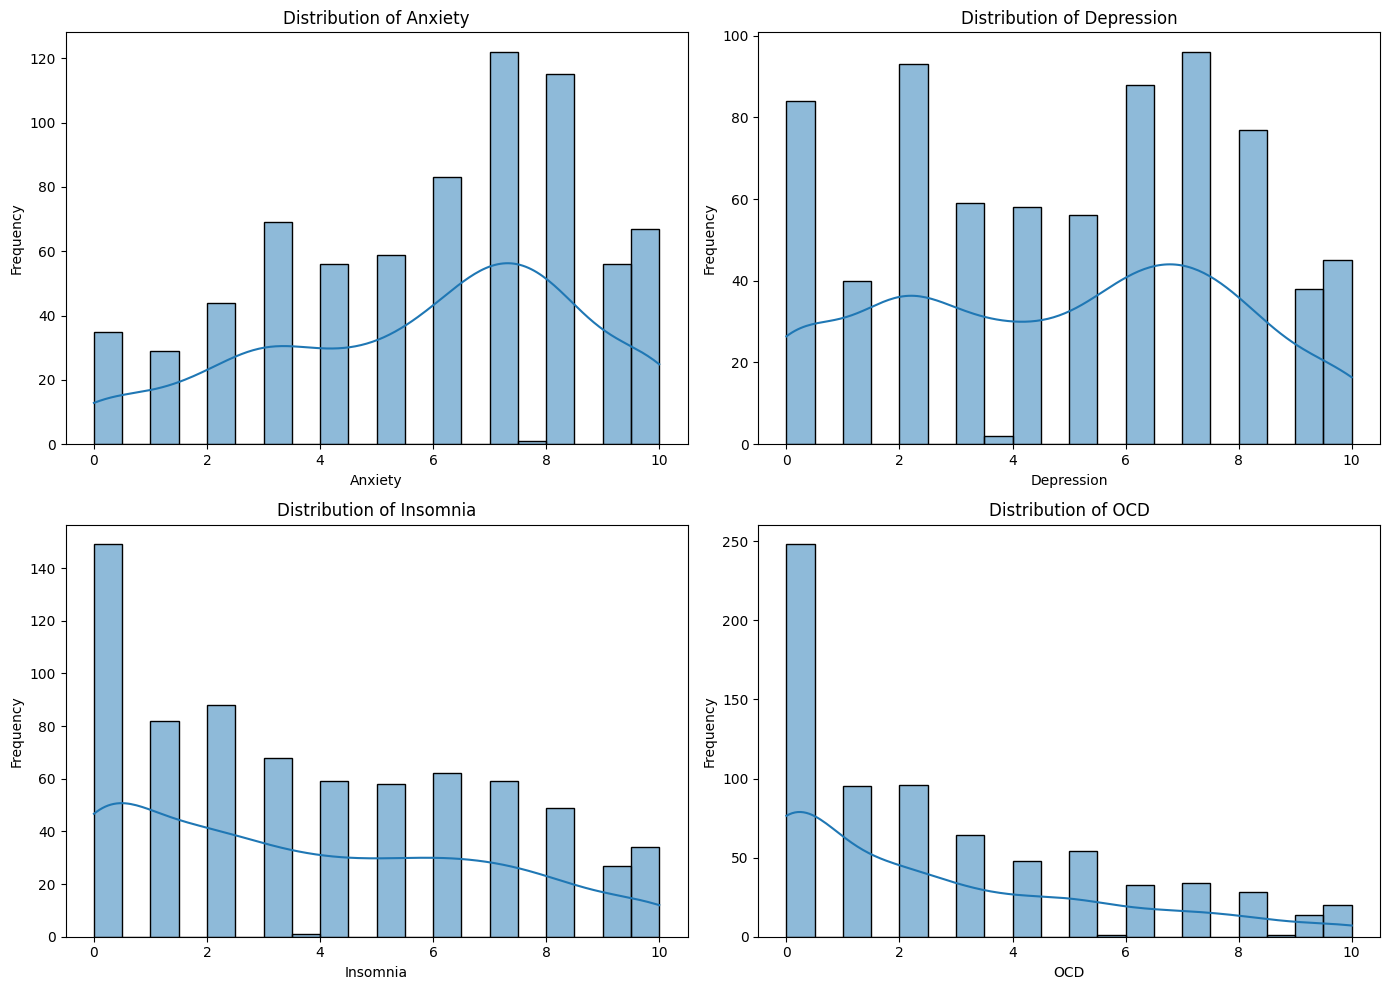

In [14]:
plt.figure(figsize=(14, 10))
for i, column in enumerate(mental_health_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data_cleaned[column], kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


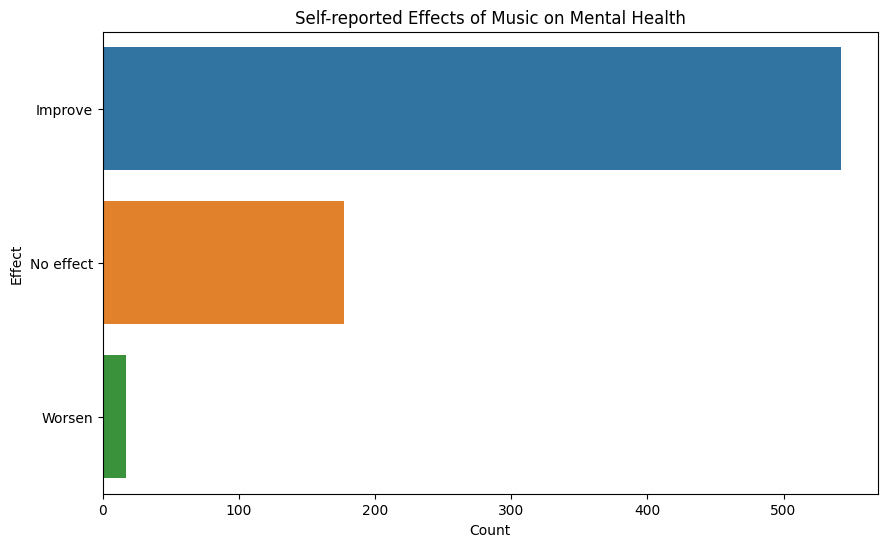

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(y=data_cleaned['Music effects'], order=data_cleaned['Music effects'].value_counts().index)
plt.title('Self-reported Effects of Music on Mental Health')
plt.xlabel('Count')
plt.ylabel('Effect')
plt.show()


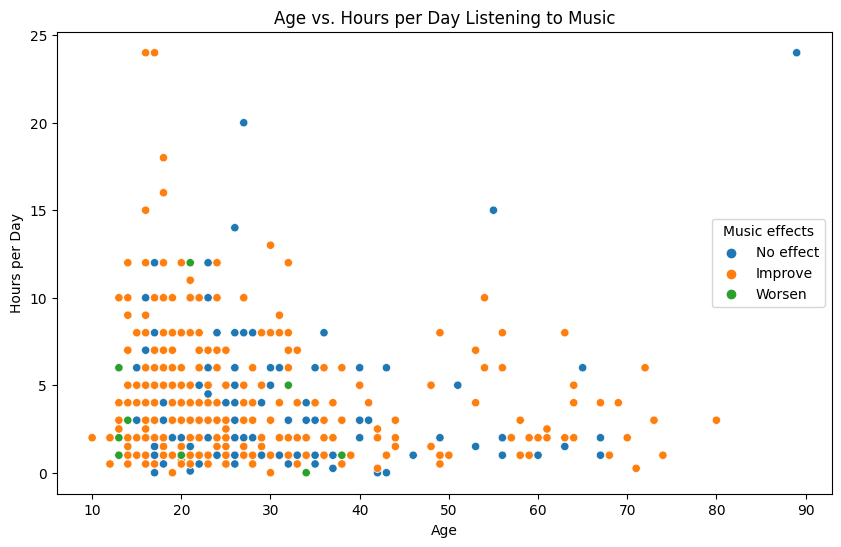

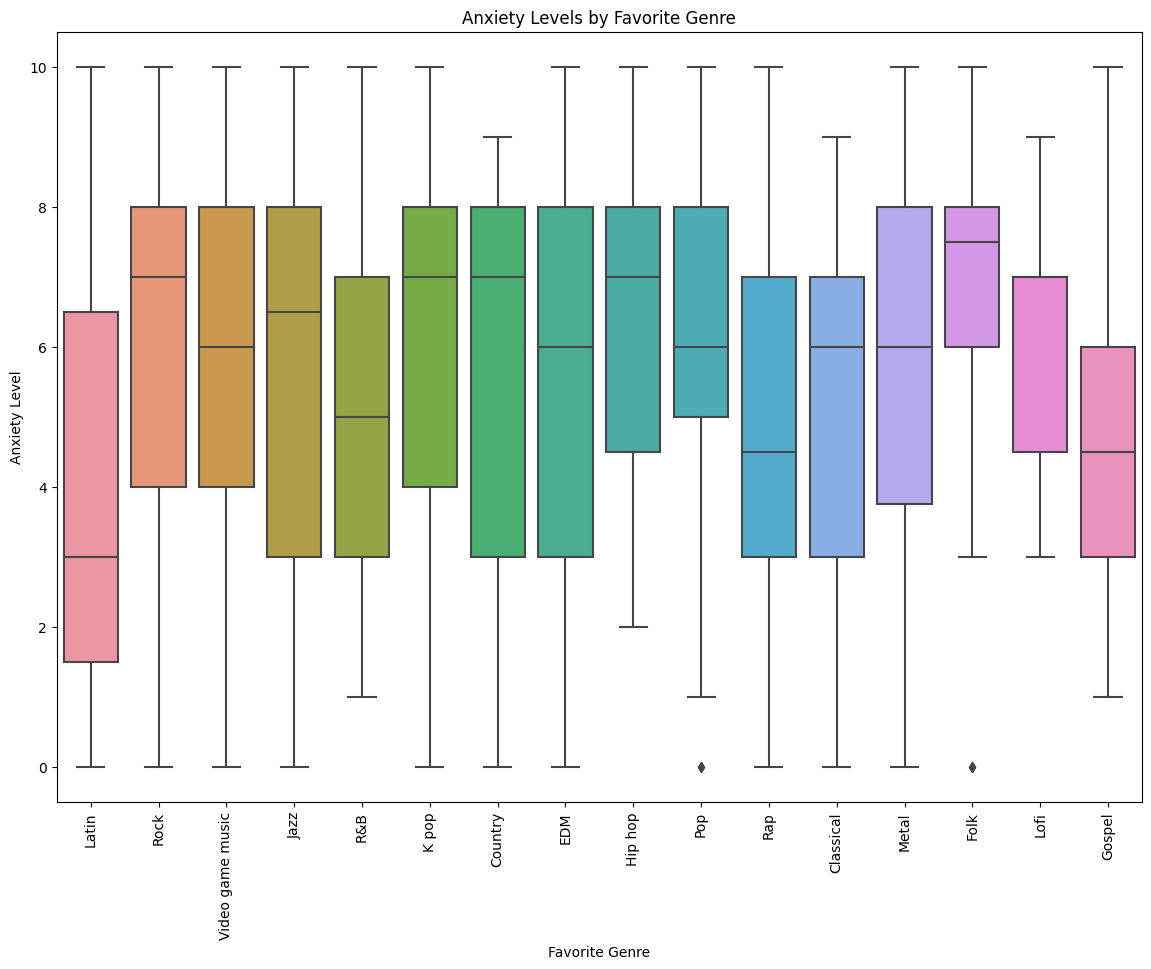

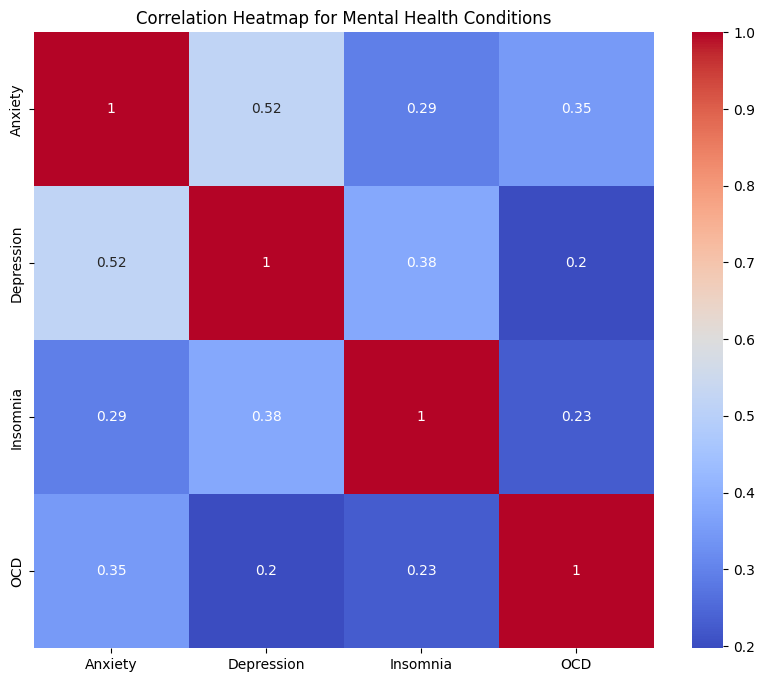

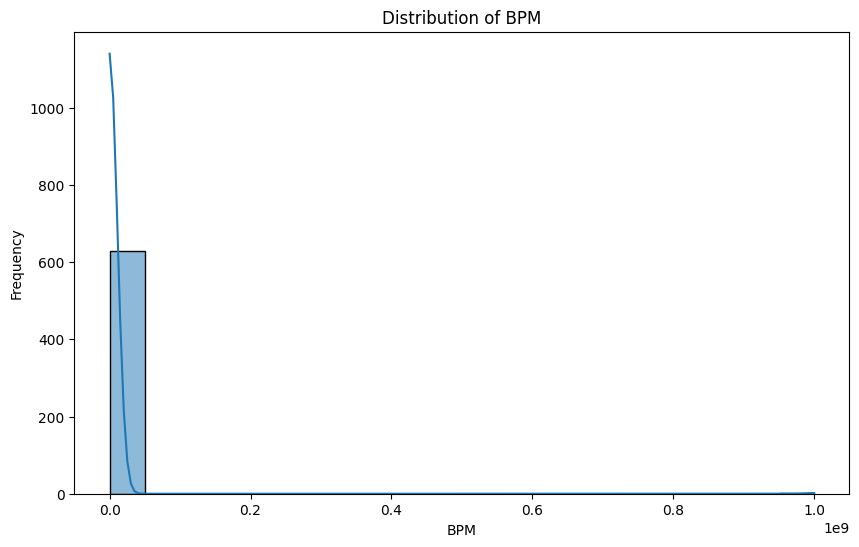

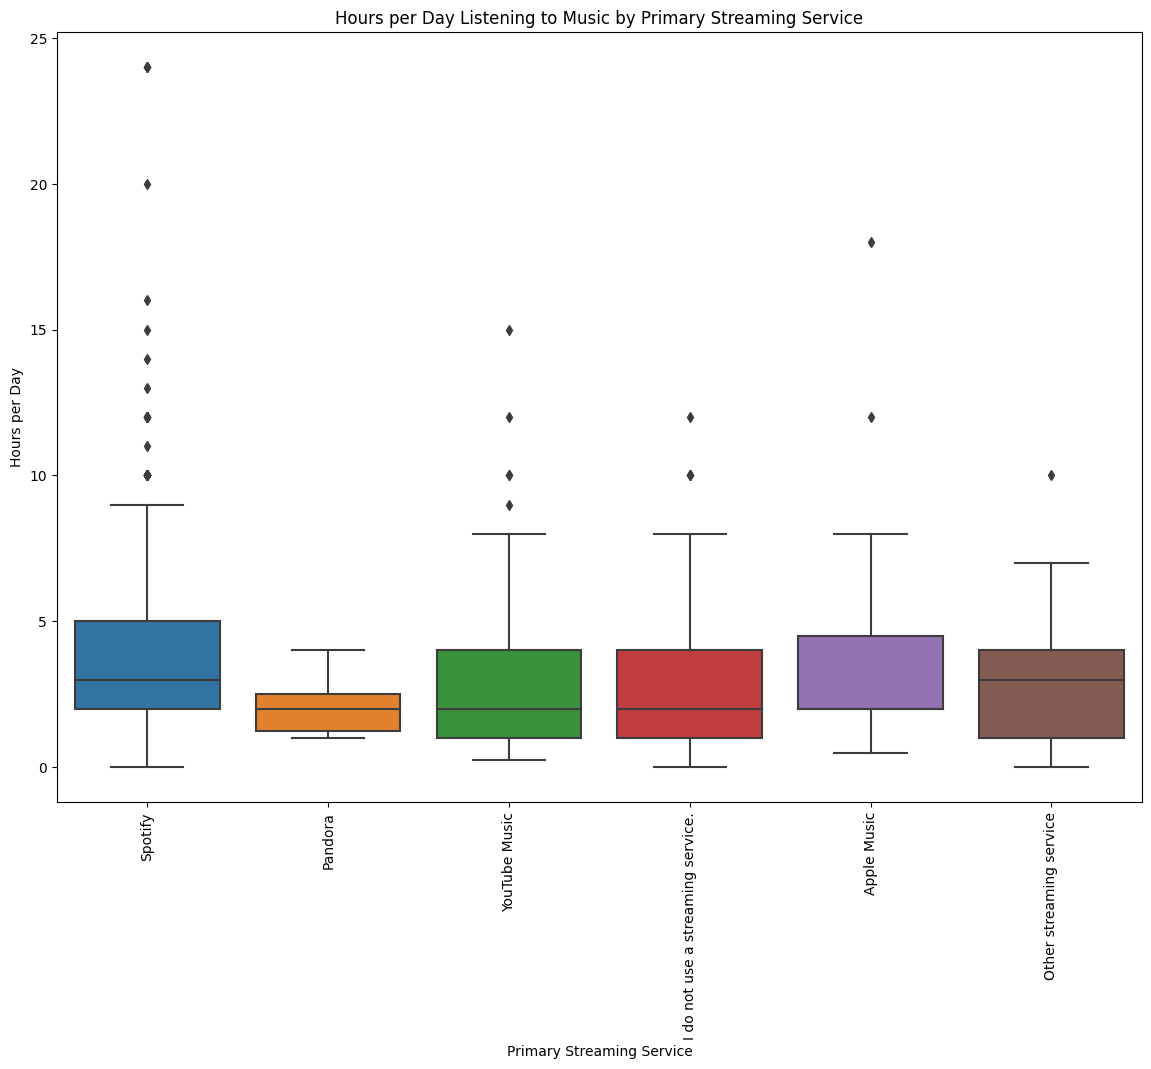

In [16]:
# Plotting additional aspects of the data

# 1. Age vs. Hours per day listening to music
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_cleaned['Age'], y=data_cleaned['Hours per day'], hue=data_cleaned['Music effects'])
plt.title('Age vs. Hours per Day Listening to Music')
plt.xlabel('Age')
plt.ylabel('Hours per Day')
plt.show()

# 2. Anxiety levels by Favorite Genre
plt.figure(figsize=(14, 10))
sns.boxplot(x='Fav genre', y='Anxiety', data=data_cleaned)
plt.title('Anxiety Levels by Favorite Genre')
plt.xlabel('Favorite Genre')
plt.ylabel('Anxiety Level')
plt.xticks(rotation=90)
plt.show()

# 3. Correlation heatmap for mental health conditions
plt.figure(figsize=(10, 8))
correlation_matrix = data_cleaned[mental_health_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Mental Health Conditions')
plt.show()

# 4. Distribution of BPM (Beats Per Minute)
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['BPM'], kde=True, bins=20)
plt.title('Distribution of BPM')
plt.xlabel('BPM')
plt.ylabel('Frequency')
plt.show()

# 5. Hours per day listening to music by Primary Streaming Service
plt.figure(figsize=(14, 10))
sns.boxplot(x='Primary streaming service', y='Hours per day', data=data_cleaned)
plt.title('Hours per Day Listening to Music by Primary Streaming Service')
plt.xlabel('Primary Streaming Service')
plt.ylabel('Hours per Day')
plt.xticks(rotation=90)
plt.show()



# SMOTE

In [18]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Define the feature columns and target variable
genre_columns = [col for col in data_cleaned.columns if 'Frequency [' in col]
feature_columns = ['Age', 'Hours per day'] + genre_columns + mental_health_columns
target_column = 'Music effects'

# Preprocessing: Encode the target variable
data_cleaned[target_column] = data_cleaned[target_column].astype('category').cat.codes

# Separate features and target variable
X = data_cleaned[feature_columns]
y = data_cleaned[target_column]



In [19]:
X

,Age,Hours per day,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],...,Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD
0,18,3.0,Rarely,Never,Rarely,Never,Never,Sometimes,Never,Very frequently,...,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0
1,63,1.5,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,Rarely,...,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0
2,18,4.0,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,...,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0
3,61,2.5,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,...,Never,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0
4,18,4.0,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,...,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17,2.0,Very frequently,Rarely,Never,Sometimes,Never,Sometimes,Rarely,Never,...,Rarely,Very frequently,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0
732,18,1.0,Rarely,Rarely,Never,Never,Never,Never,Rarely,Never,...,Never,Very frequently,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0
733,19,6.0,Rarely,Sometimes,Sometimes,Rarely,Rarely,Very frequently,Rarely,Rarely,...,Rarely,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0
734,19,5.0,Very frequently,Never,Never,Never,Never,Never,Rarely,Never,...,Never,Never,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0


In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
# Define feature columns and target variable
genre_columns = [col for col in data_cleaned.columns if 'Frequency [' in col]
feature_columns = ['Age', 'Hours per day'] + genre_columns + mental_health_columns
target_column = 'Music effects'

# Preprocessing: Encode the target variable and categorical features
data_cleaned[target_column] = data_cleaned[target_column].astype('category').cat.codes

encoded_data = data_cleaned.copy()
label_encoders = {}
for column in feature_columns:
    if encoded_data[column].dtype == 'object':
        le = LabelEncoder()
        encoded_data[column] = le.fit_transform(encoded_data[column])
        label_encoders[column] = le

# Separate features and target variable
X = encoded_data[feature_columns]
y = encoded_data[target_column]

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert resampled data back to DataFrame
resampled_data = pd.DataFrame(X_resampled, columns=feature_columns)
resampled_data[target_column] = y_resampled

# Display the count of each class in the resampled data
print(resampled_data[target_column].value_counts())

1    542
0    542
2    542
Name: Music effects, dtype: int64


In [25]:
from sklearn.utils import resample

In [26]:
# Upsample minority classes to 2000 samples each
target_class_counts = data_cleaned[target_column].value_counts()
majority_class_size = 2000

# Separate majority and minority classes
data_majority = data_cleaned[data_cleaned[target_column] == target_class_counts.idxmax()]
data_minority = [data_cleaned[data_cleaned[target_column] == cls] for cls in target_class_counts.index if cls != target_class_counts.idxmax()]

# Upsample minority classes
data_minority_upsampled = [resample(cls_data, 
                                    replace=True,     # sample with replacement
                                    n_samples=majority_class_size,    # to match majority class
                                    random_state=42)  # reproducible results
                           for cls_data in data_minority]

# Combine majority class with upsampled minority classes
data_upsampled = pd.concat([data_majority] + data_minority_upsampled)

# Display the count of each class in the upsampled data
upsampled_class_counts = data_upsampled[target_column].value_counts()
upsampled_class_counts

1    2000
2    2000
0     542
Name: Music effects, dtype: int64

In [27]:
data_upsampled

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
3,8/27/2022 21:40:40,61,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,0,I understand.
4,8/27/2022 21:54:47,18,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,0,I understand.
5,8/27/2022 21:56:50,18,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,0,I understand.
6,8/27/2022 22:00:29,18,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,0,I understand.
7,8/27/2022 22:18:59,21,Spotify,1.0,Yes,No,No,K pop,Yes,Yes,...,Sometimes,Rarely,Never,Rarely,5.0,3.0,5.0,3.0,0,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,8/28/2022 17:19:10,13,Spotify,2.0,Yes,Yes,Yes,Rock,Yes,No,...,Rarely,Very frequently,Very frequently,Very frequently,7.0,10.0,5.0,6.0,2,I understand.
442,8/31/2022 18:56:39,13,Spotify,6.0,Yes,No,No,Rap,Yes,No,...,Never,Very frequently,Never,Never,4.0,0.0,0.0,2.0,2,I understand.
64,8/28/2022 13:42:20,32,Spotify,5.0,Yes,No,No,Rock,No,Yes,...,Very frequently,Rarely,Very frequently,Never,10.0,10.0,3.0,1.0,2,I understand.
455,9/1/2022 14:56:21,34,Spotify,0.0,No,Yes,No,Rock,No,Yes,...,Never,Never,Very frequently,Never,3.0,7.0,8.0,0.0,2,I understand.


In [28]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X_upsampled = data_upsampled[feature_columns]
y_upsampled = data_upsampled[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_upsampled, y_upsampled, test_size=0.2, random_state=42)

# Verify the split
train_size = X_train.shape[0]
test_size = X_test.shape[0]
train_size, test_size


(3633, 909)

# SVM

In [33]:
# Encoding the categorical variables to numerical values
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [34]:
encoded_train = X_train.copy()
encoded_test = X_test.copy()

# Apply label encoding to all categorical features
label_encoders = {}
for column in encoded_train.columns:
    if encoded_train[column].dtype == 'object':
        le = LabelEncoder()
        encoded_train[column] = le.fit_transform(encoded_train[column])
        encoded_test[column] = le.transform(encoded_test[column])
        label_encoders[column] = le

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(encoded_train)
X_test_scaled = scaler.transform(encoded_test)

In [35]:
# Initialize the SVM model
svm_model = SVC(random_state=42)

# Re-train the SVM model with scaled data
svm_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [36]:

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Compute the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
classification_rep = classification_report(y_test, y_pred)

# Display the results
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1,
    'Classification Report': classification_rep
}

metrics


{'Accuracy': 0.9295929592959296,
 'Precision': 0.939046739725519,
 'Recall': 0.9295929592959296,
 'F1-score': 0.9197500285559115,
 'Classification Report': '              precision    recall  f1-score   support\n\n           0       1.00      0.48      0.65       123\n           1       0.86      1.00      0.93       399\n           2       1.00      1.00      1.00       387\n\n    accuracy                           0.93       909\n   macro avg       0.95      0.83      0.86       909\nweighted avg       0.94      0.93      0.92       909\n'}

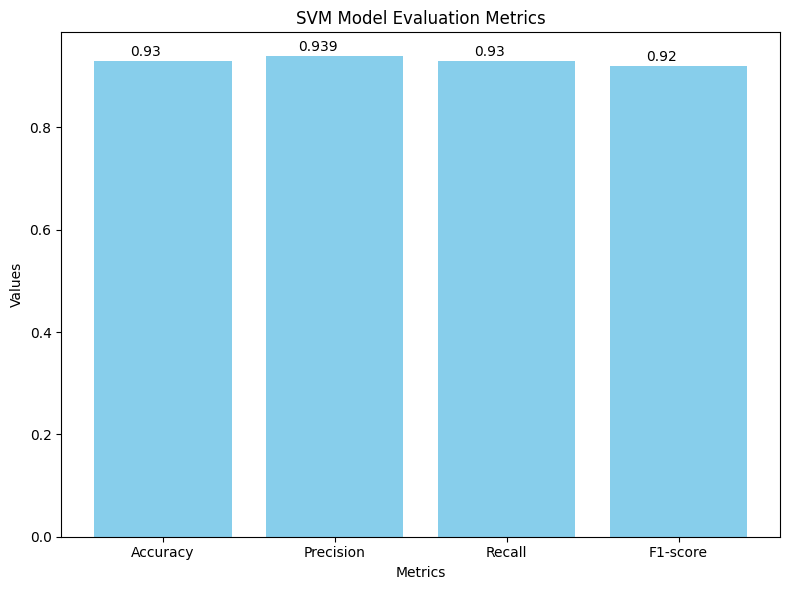

In [2]:
import matplotlib.pyplot as plt

# Data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [0.9295929592959296, 0.939046739725519, 0.9295929592959296, 0.9197500285559115]

# Create bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, values, color='skyblue')

# Annotate bars with values
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, round(value, 3), ha='center', color='black')

# Add title and labels
plt.title('SVM Model Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')

# Show plot
plt.tight_layout()
plt.show()


# Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [38]:
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Compute the metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Display the results
rf_metrics = {
    'Accuracy': accuracy_rf,
    'Precision': precision_rf,
    'Recall': recall_rf,
    'F1-score': f1_rf,
    'Classification Report': classification_rep_rf
}

rf_metrics


{'Accuracy': 0.9834983498349835,
 'Precision': 0.9840962357105275,
 'Recall': 0.9834983498349835,
 'F1-score': 0.9831148112175477,
 'Classification Report': '              precision    recall  f1-score   support\n\n           0       1.00      0.88      0.94       123\n           1       0.96      1.00      0.98       399\n           2       1.00      1.00      1.00       387\n\n    accuracy                           0.98       909\n   macro avg       0.99      0.96      0.97       909\nweighted avg       0.98      0.98      0.98       909\n'}

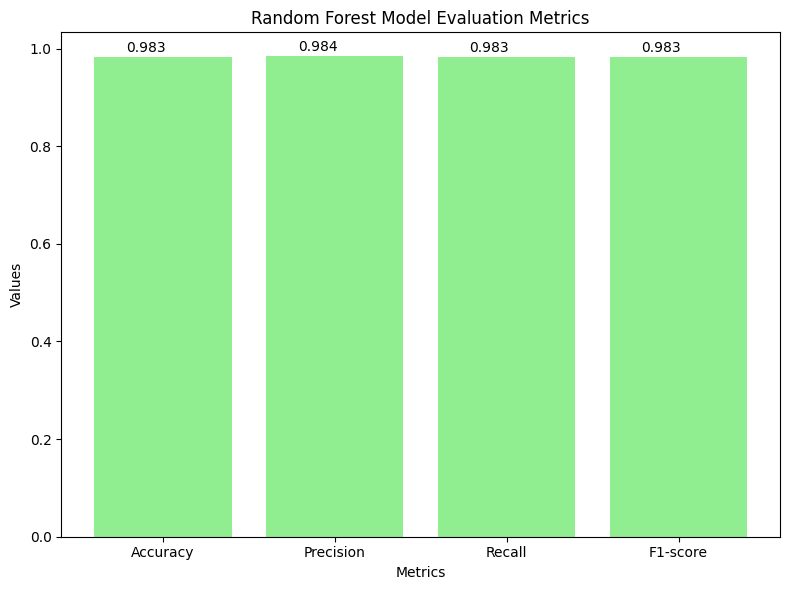

In [3]:
import matplotlib.pyplot as plt

# Data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [0.9834983498349835, 0.9840962357105275, 0.9834983498349835, 0.9831148112175477]

# Create bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, values, color='lightgreen')

# Annotate bars with values
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, round(value, 3), ha='center', color='black')

# Add title and labels
plt.title('Random Forest Model Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')

# Show plot
plt.tight_layout()
plt.show()


# LSTM

In [39]:
import numpy as np

# Reshape data to 3D (samples, time steps, features)
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical

# Convert target to categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dense(3, activation='softmax'))  # Assuming 4 classes

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_lstm, y_train_cat, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test_cat), verbose=2)


Epoch 1/50
114/114 - 1s - loss: 0.9253 - accuracy: 0.6433 - val_loss: 0.7728 - val_accuracy: 0.6997 - 624ms/epoch - 5ms/step
Epoch 2/50
114/114 - 0s - loss: 0.6691 - accuracy: 0.7693 - val_loss: 0.5950 - val_accuracy: 0.7844 - 72ms/epoch - 630us/step
Epoch 3/50
114/114 - 0s - loss: 0.5146 - accuracy: 0.8357 - val_loss: 0.4838 - val_accuracy: 0.8328 - 72ms/epoch - 636us/step
Epoch 4/50
114/114 - 0s - loss: 0.4155 - accuracy: 0.8604 - val_loss: 0.4143 - val_accuracy: 0.8504 - 71ms/epoch - 621us/step
Epoch 5/50
114/114 - 0s - loss: 0.3545 - accuracy: 0.8800 - val_loss: 0.3704 - val_accuracy: 0.8636 - 70ms/epoch - 610us/step
Epoch 6/50
114/114 - 0s - loss: 0.3147 - accuracy: 0.8899 - val_loss: 0.3408 - val_accuracy: 0.8680 - 70ms/epoch - 613us/step
Epoch 7/50
114/114 - 0s - loss: 0.2871 - accuracy: 0.8932 - val_loss: 0.3201 - val_accuracy: 0.8702 - 71ms/epoch - 627us/step
Epoch 8/50
114/114 - 0s - loss: 0.2649 - accuracy: 0.9004 - val_loss: 0.3048 - val_accuracy: 0.8779 - 73ms/epoch - 637u

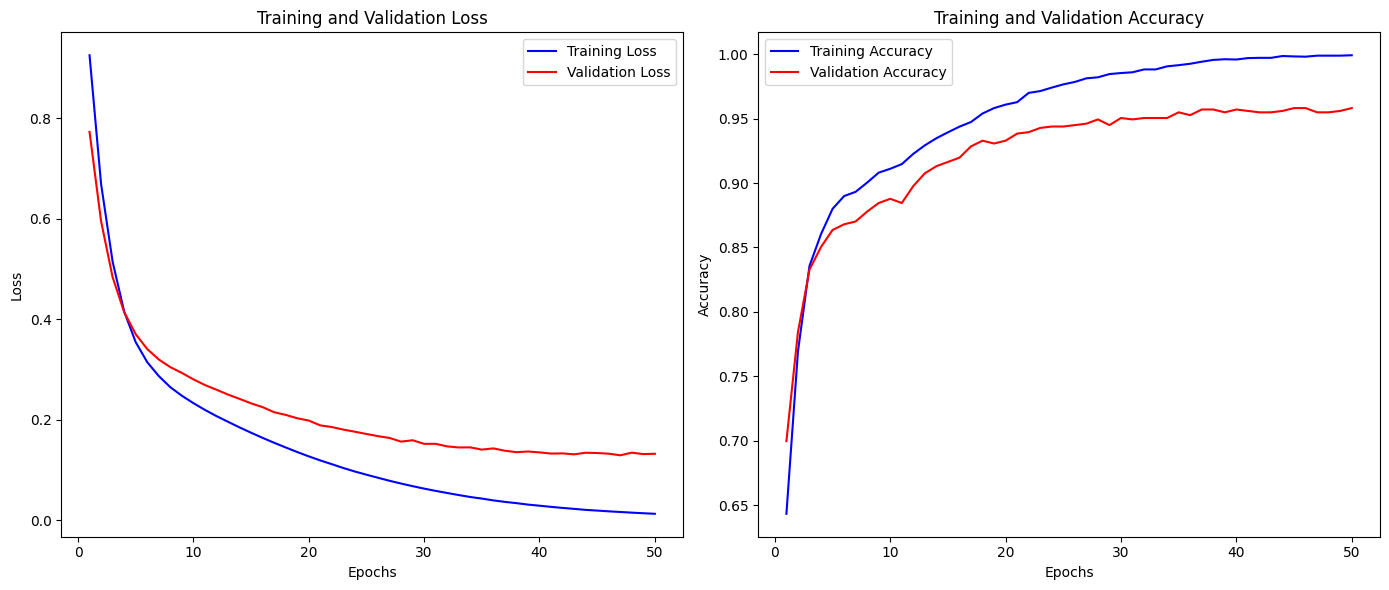

In [4]:
import matplotlib.pyplot as plt

# Data
epochs = range(1, 51)
train_loss = [0.9253, 0.6691, 0.5146, 0.4155, 0.3545, 0.3147, 0.2871, 0.2649, 0.2479, 0.2332, 
              0.2197, 0.2074, 0.1961, 0.1849, 0.1743, 0.1641, 0.1543, 0.1450, 0.1359, 0.1273,
              0.1192, 0.1117, 0.1041, 0.0971, 0.0908, 0.0847, 0.0787, 0.0732, 0.0680, 0.0631,
              0.0586, 0.0544, 0.0503, 0.0464, 0.0433, 0.0397, 0.0367, 0.0342, 0.0313, 0.0291,
              0.0268, 0.0247, 0.0228, 0.0208, 0.0194, 0.0179, 0.0166, 0.0153, 0.0141, 0.0130]

val_loss = [0.7728, 0.5950, 0.4838, 0.4143, 0.3704, 0.3408, 0.3201, 0.3048, 0.2933, 0.2805, 
            0.2692, 0.2599, 0.2502, 0.2417, 0.2328, 0.2252, 0.2151, 0.2098, 0.2031, 0.1985, 
            0.1889, 0.1856, 0.1805, 0.1763, 0.1718, 0.1675, 0.1639, 0.1566, 0.1593, 0.1522,
            0.1522, 0.1471, 0.1450, 0.1452, 0.1407, 0.1431, 0.1385, 0.1356, 0.1369, 0.1352,
            0.1328, 0.1332, 0.1313, 0.1345, 0.1339, 0.1326, 0.1294, 0.1346, 0.1318, 0.1324]

train_accuracy = [0.6433, 0.7693, 0.8357, 0.8604, 0.8800, 0.8899, 0.8932, 0.9004, 0.9081, 0.9111,
                  0.9147, 0.9227, 0.9293, 0.9348, 0.9394, 0.9438, 0.9474, 0.9540, 0.9582, 0.9609,
                  0.9628, 0.9700, 0.9714, 0.9741, 0.9766, 0.9785, 0.9813, 0.9821, 0.9846, 0.9854,
                  0.9860, 0.9882, 0.9882, 0.9906, 0.9915, 0.9926, 0.9942, 0.9956, 0.9961, 0.9959,
                  0.9970, 0.9972, 0.9972, 0.9986, 0.9983, 0.9981, 0.9989, 0.9989, 0.9989, 0.9992]

val_accuracy = [0.6997, 0.7844, 0.8328, 0.8504, 0.8636, 0.8680, 0.8702, 0.8779, 0.8845, 0.8878,
                0.8845, 0.8977, 0.9076, 0.9131, 0.9164, 0.9197, 0.9285, 0.9329, 0.9307, 0.9329,
                0.9384, 0.9395, 0.9428, 0.9439, 0.9439, 0.9450, 0.9461, 0.9494, 0.9450, 0.9505,
                0.9494, 0.9505, 0.9505, 0.9505, 0.9549, 0.9527, 0.9571, 0.9571, 0.9549, 0.9571,
                0.9560, 0.9549, 0.9549, 0.9560, 0.9582, 0.9582, 0.9549, 0.9549, 0.9560, 0.9582]

# Plot
plt.figure(figsize=(14, 6))

# Loss subplot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy subplot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'b-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [43]:
# Make predictions on the test set
y_pred_lstm_prob = model.predict(X_test_lstm)
y_pred_lstm = np.argmax(y_pred_lstm_prob, axis=1)

# Compute the metrics
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
precision_lstm = precision_score(y_test, y_pred_lstm, average='weighted')
recall_lstm = recall_score(y_test, y_pred_lstm, average='weighted')
f1_lstm = f1_score(y_test, y_pred_lstm, average='weighted')
classification_rep_lstm = classification_report(y_test, y_pred_lstm)

# Display the results
lstm_metrics = {
    'Accuracy': accuracy_lstm,
    'Precision': precision_lstm,
    'Recall': recall_lstm,
    'F1-score': f1_lstm,
    'Classification Report': classification_rep_lstm
}

print(lstm_metrics)


29/29 [==============================] - 0s 351us/step
{'Accuracy': 0.9548954895489549, 'Precision': 0.9579693195166811, 'Recall': 0.9548954895489549, 'F1-score': 0.9511838081153727, 'Classification Report': '              precision    recall  f1-score   support\n\n           0       1.00      0.67      0.80       123\n           1       0.92      1.00      0.96       399\n           2       0.98      1.00      0.99       387\n\n    accuracy                           0.95       909\n   macro avg       0.97      0.89      0.92       909\nweighted avg       0.96      0.95      0.95       909\n'}


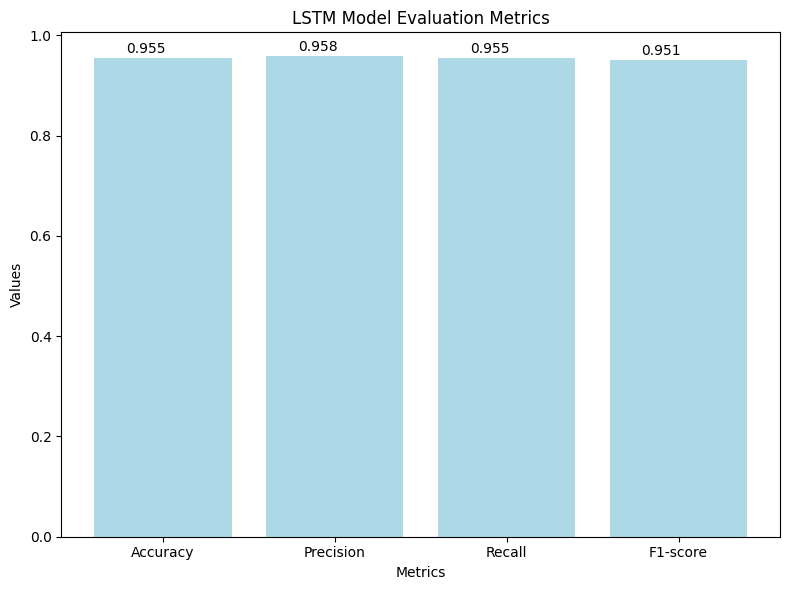

In [6]:
import matplotlib.pyplot as plt

# Data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [0.9548954895489549, 0.9579693195166811, 0.9548954895489549, 0.9511838081153727]

# Create bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, values, color='lightblue')

# Annotate bars with values
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, round(value, 3), ha='center', color='black')

# Add title and labels
plt.title('LSTM Model Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')

# Show plot
plt.tight_layout()
plt.show()


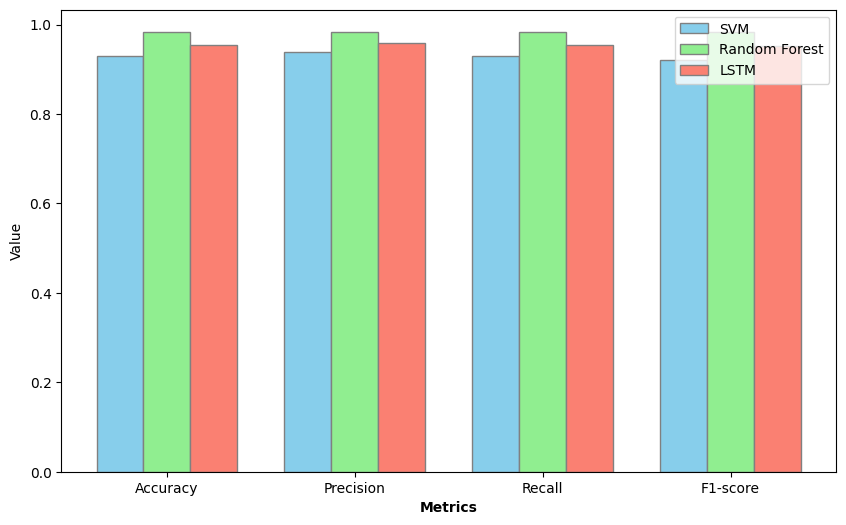

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['SVM', 'Random Forest', 'LSTM']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
svm_values = [0.9295929592959296, 0.939046739725519, 0.9295929592959296, 0.9197500285559115]
rf_values = [0.9834983498349835, 0.9840962357105275, 0.9834983498349835, 0.9831148112175477]
lstm_values = [0.9548954895489549, 0.9579693195166811, 0.9548954895489549, 0.9511838081153727]

# Transpose the data
svm_values_t = np.array(svm_values).reshape(1, len(svm_values))
rf_values_t = np.array(rf_values).reshape(1, len(rf_values))
lstm_values_t = np.array(lstm_values).reshape(1, len(lstm_values))

# Set width of bar
barWidth = 0.25
 
# Set position of bar on X axis
r1 = np.arange(len(metrics))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Plot
plt.figure(figsize=(10, 6))

plt.bar(r1, svm_values_t[0], color='skyblue', width=barWidth, edgecolor='grey', label='SVM')
plt.bar(r2, rf_values_t[0], color='lightgreen', width=barWidth, edgecolor='grey', label='Random Forest')
plt.bar(r3, lstm_values_t[0], color='salmon', width=barWidth, edgecolor='grey', label='LSTM')
 
# Add xticks on the middle of the group bars
plt.xlabel('Metrics', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(metrics))], metrics)
plt.ylabel('Value')
 
# Create legend & Show graphic
plt.legend()
plt.show()
